In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [9]:
train = pd.read_csv('c:/data/project/train.csv')
test = pd.read_csv('c:/data/project/test.csv')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   first_party         2478 non-null   object
 2   second_party        2478 non-null   object
 3   facts               2478 non-null   object
 4   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 96.9+ KB


In [11]:
train.head()

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [12]:
train.drop(columns=['ID', 'first_party', 'second_party'], inplace=True)

,facts,first_party_winner
0,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,Ramon Nelson was riding his bike when he suffe...,0
2,An Alabama state court convicted Billy Joe Mag...,1
3,Victor Linkletter was convicted in state court...,0
4,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [13]:
train.head()

,facts,first_party_winner
0,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,Ramon Nelson was riding his bike when he suffe...,0
2,An Alabama state court convicted Billy Joe Mag...,1
3,Victor Linkletter was convicted in state court...,0
4,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [14]:
train['first_party_winner'].value_counts()

first_party_winner
1    1649
0     829
Name: count, dtype: int64

In [15]:
train_target = pd.DataFrame(train, columns=['first_party_winner'])
train_target

,first_party_winner
0,1
1,0
2,1
3,0
4,1
...,...
2473,1
2474,1
2475,0
2476,0


In [16]:
# train_target = train['first_party_winner']
train_nlp = train['facts']
train_nlp = pd.DataFrame(train_nlp, columns=['facts'])
train_nlp
#train_nlps['facts'] = train_nlps['facts'].str.replace(r'<[^<>]*>', '', regex=True)
#train_nlps

,facts
0,"On June 27, 1962, Phil St. Amant, a candidate ..."
1,Ramon Nelson was riding his bike when he suffe...
2,An Alabama state court convicted Billy Joe Mag...
3,Victor Linkletter was convicted in state court...
4,"On April 24, 1953 in Selma, Alabama, an intrud..."
...,...
2473,Congress amended the Clean Air Act through the...
2474,"Alliance Bond Fund, Inc., an investment fund, ..."
2475,"In 1992, the District Court sentenced Manuel D..."
2476,"On March 8, 1996, Enrico St. Cyr, a lawful per..."


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download()

In [ ]:
from nltk.tokenize import WhitespaceTokenizer

corpus = train_nlp['facts']
Tokenizer=WhitespaceTokenizer()
lst_tokens = Tokenizer.tokenize(str(corpus))
lst_tokens
# 공백 단위로 문자 쪼개기

In [17]:
import nltk

corpus = train_nlp["facts"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
# 어절 별로 키워드 반환

ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()

lst_tokens

['On',
 'June',
 '27',
 ',',
 '1962',
 ',',
 'Phil',
 'St.',
 'Amant',
 ',',
 'a',
 'candidate',
 'for',
 'public',
 'office',
 ',',
 'made',
 'a',
 'television',
 'speech',
 'in',
 'Baton',
 'Rouge',
 ',',
 'Louisiana',
 '.',
 'During',
 'this',
 'speech',
 ',',
 'St.',
 'Amant',
 'accused',
 'his',
 'political',
 'opponent',
 'of',
 'being',
 'a',
 'Communist',
 'and',
 'of',
 'being',
 'involved',
 'in',
 'criminal',
 'activities',
 'with',
 'the',
 'head',
 'of',
 'the',
 'local',
 'Teamsters',
 'Union',
 '.',
 'Finally',
 ',',
 'St.',
 'Amant',
 'implicated',
 'Herman',
 'Thompson',
 ',',
 'an',
 'East',
 'Baton',
 'Rouge',
 'deputy',
 'sheriff',
 ',',
 'in',
 'a',
 'scheme',
 'to',
 'move',
 'money',
 'between',
 'the',
 'Teamsters',
 'Union',
 'and',
 'St.',
 'Amant',
 '’',
 's',
 'political',
 'opponent',
 '.',
 'Thompson',
 'successfully',
 'sued',
 'St.',
 'Amant',
 'for',
 'defamation',
 '.',
 'Louisiana',
 '’',
 's',
 'First',
 'Circuit',
 'Court',
 'of',
 'Appeals',
 'reve

In [18]:
lst_stopwords = nltk.corpus.stopwords.words("english")
# NLTK가 정의한 영어 불용어 리스트를 리턴
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
import re

def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None): 
## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [60]:
from collections import Counter

stop_words = 'court case state action'

stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
corpus = [word for word in corpus if not word in stop_words]

counts = Counter(corpus)
tags = counts.most_common(100)

tags

[('june 27 1962 phil st amant candidate public office made television speech baton rouge louisiana speech st amant accused political opponent communist involved criminal activity head local teamster union finally st amant implicated herman thompson east baton rouge deputy sheriff scheme move money teamster union st amants political opponent thompson successfully sued st amant defamation louisiana first circuit court appeal reversed holding thompson show st amant acted malice thompson appealed supreme court louisiana court held although public figure forfeit first amendment protection defamation st amant accused thompson crime utter disregard whether remark true finally court held first amendment protects uninhibited robust debate rather open season shoot good name anyone happens public servant',
  1),
 ('alabama state court convicted billy joe magwood murder sentenced death subsequently alabama federal district court partially granted mr magwoods petition federal habeas corpus relief c

In [62]:
train_nlp["facts_clean"] = train_nlp["facts"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

train_nlp

,facts,facts_clean
0,"On June 27, 1962, Phil St. Amant, a candidate ...",june 27 1962 phil st amant candidate public of...
1,Ramon Nelson was riding his bike when he suffe...,ramon nelson riding bike suffered lethal blow ...
2,An Alabama state court convicted Billy Joe Mag...,alabama state court convicted billy joe magwoo...
3,Victor Linkletter was convicted in state court...,victor linkletter convicted state court eviden...
4,"On April 24, 1953 in Selma, Alabama, an intrud...",april 24 1953 selma alabama intruder broke apa...
...,...,...
2473,Congress amended the Clean Air Act through the...,congress amended clean air act energy policy a...
2474,"Alliance Bond Fund, Inc., an investment fund, ...",alliance bond fund inc investment fund purchas...
2475,"In 1992, the District Court sentenced Manuel D...",1992 district court sentenced manuel peguero 2...
2476,"On March 8, 1996, Enrico St. Cyr, a lawful per...",march 8 1996 enrico st cyr lawful permanent re...


In [21]:
train_nlp2 = pd.concat([train_nlp,train_target['first_party_winner']],axis=1, join='inner')

train_nlp2["first_party_winner"].value_counts()

first_party_winner
1    1649
0     829
Name: count, dtype: int64

In [22]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

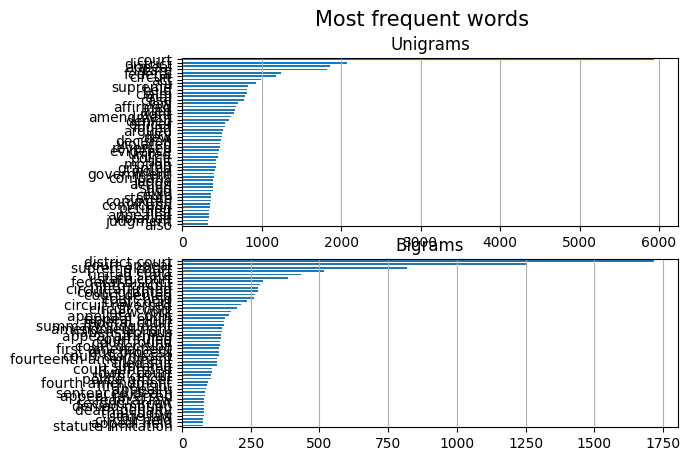

<Figure size 3000x2400 with 0 Axes>

In [42]:
y = 1
corpus = train_nlp2[train_nlp2["first_party_winner"]== y]["facts_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.suptitle("Most frequent words", fontsize=15)
figure(figsize=(30, 24))
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:50,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:50,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

In [57]:
y=1
corpus1 = train_nlp2[train_nlp2["first_party_winner"]== y]["facts_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus1.str.cat(sep=" "))

dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])
# dtf_uni[40:60]
dtf_uni

,Word,Freq
0,court,5943
1,district,2071
2,appeal,1856
3,state,1827
4,federal,1250
...,...,...
14410,uninterrupted,1
14411,mexicano,1
14412,desarrollo,1
14413,insolvency,1


In [53]:
y=0
corpus = train_nlp2[train_nlp2["first_party_winner"]== y]["facts_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))

dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])
dtf_uni

,Word,Freq
0,court,2833
1,district,1097
2,state,966
3,appeal,901
4,federal,636
...,...,...
10083,localize,1
10084,spurious,1
10085,barcoded,1
10086,westviews,1


In [25]:
!pip install wordcloud

     ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
     -------- ------------------------------- 30.7/151.4 kB ? eta -:--:--
     ------------------------------ ------- 122.9/151.4 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 151.4/151.4 kB 1.3 MB/s eta 0:00:00


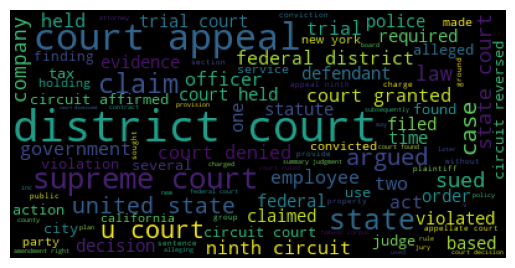

In [67]:
import wordcloud

wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
#train_nlp2 = pd.concat([train_nlp,train_target['first_party_winner']],axis=1, join='inner')
xfeatures = train_nlp2['facts_clean']
ylabel = train_nlp2['first_party_winner']

## Data Preprocessing

In [ ]:
vectorizer = TfidfVectorizer()
def get_vector(vectorizer, df, train_mode):
    if train_mode:
        X_facts = vectorizer.fit_transform(df['facts'])
    else:
        X_facts = vectorizer.transform(df['facts'])
    X_party1 = vectorizer.transform(df['first_party'])
    X_party2 = vectorizer.transform(df['second_party'])
    
    X = np.concatenate([X_party1.todense(), X_party2.todense(), X_facts.todense()], axis=1)
    return X

In [ ]:
tfidf_matrix = vectorizer.fit_transform(train['facts'])

from sklearn.metrics.pairwise import cosine_similarity
# 첫 번째와 두 번째 문장 비교
cos_similar = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print("코사인 유사도 측정")
print(cos_similar)

In [ ]:
tfidfv = TfidfVectorizer().fit(train['facts'])
print(tfidfv.vocabulary_)
print("="*100)
print(tfidfv.transform(train['facts']).toarray())
print("="*100)
print(tfidfv.fit_transform(train['facts']).toarray())

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
tfidf_matrix = tfidfv.fit_transform(train['facts'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

In [ ]:
tfidfv.vocabulary_.keys()

In [ ]:
#word_list = [i for i in sorted(tfidfv.vocabulary_.keys())]
word_list=tfidfv.vocabulary_.keys()
# vec_X_train을 DataFrame 화
pd.DataFrame(tfidf_matrix.toarray(), columns=word_list)
#pd.DataFrame(cosine_sim, columns=word_list)

In [ ]:
X_train = get_vector(vectorizer, train, True)
Y_train = train["first_party_winner"]
X_test = get_vector(vectorizer, test, False)

## Define Model & Train

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

## Inference & Submission

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
pred = model.predict(X_test)

In [ ]:
submit['first_party_winner'] = pred
submit.to_csv('./baseline_submit.csv', index=False)
print('Done')